## 1. Intro
The `SciPy` library is one of the core packages for  scientific computing that provides mathematical  algorithms and convenience functions built on the NumPy extension of Python.

## 2. Interacting With NumPy

In [1]:
import numpy as np
import scipy as sp
a = np.array([1, 2, 3])
b = np.array([(1 + 5j, 2j, 3j), (4j, 5j, 6j)])
c = np.array([[(1.5, 2, 3), (4, 5, 6)], [(3, 2, 1), (4, 5, 6)]])

<img src="./Screenshots/NumPy_01.PNG">

<img src="./Screenshots/NumPy_02.jpg">

### Index Tricks
#### Create a dense meshgrid

In [2]:
np.mgrid[0:3, 0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [3]:
aa, bb = np.mgrid[0:3, 0:5]

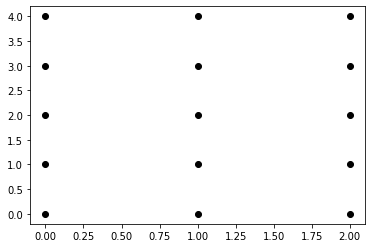

In [4]:
import matplotlib.pyplot as plt
plt.plot(aa, bb, marker='o', color='k', linestyle='none')

In [5]:
np.meshgrid([1, 2, 3, 4], [5, 6, 7])

[array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]), array([[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7]])]

See the picture to understand the mesh grid:

<img src="./Screenshots/SciPy_01.PNG">

Mesh Grid Purpose: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

In [6]:
# Create an open meshgrid
np.ogrid[0:3, 0:3] 

[array([[0],
        [1],
        [2]]), array([[0, 1, 2]])]

**GRID**: https://inneka.com/programming/python/mesh-grid-functions-in-python-meshgrid-mgrid-ogrid-ndgrid/

In [7]:
# Stack arrays vertically (row-wise)
np.r_[3, [0]*5, -1:1:10j]

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

In [8]:
# Create stacked column-wise arrays 
a1 = np.array([6, 1, 2])
np.c_[a, a1]

array([[1, 6],
       [2, 1],
       [3, 2]])

### Shape Manipulation

In [9]:
a = np.array([1, 2, 3])
a1 = np.array([6, 1, 2])
b = np.array([(1 + 5j, 2j, 3j), (4j, 5j, 6j)])
c = np.array([[(1.5, 2, 3), (4, 5, 6)], [(3, 2, 1), (4, 5, 6)]])

In [10]:
# Permute array dimensions 
np.transpose(b)           

array([[1.+5.j, 0.+4.j],
       [0.+2.j, 0.+5.j],
       [0.+3.j, 0.+6.j]])

In [11]:
# Flatten the array
b.flatten()                

array([1.+5.j, 0.+2.j, 0.+3.j, 0.+4.j, 0.+5.j, 0.+6.j])

In [12]:
# Stack arrays horizontally (column-wise)
np.hstack((a, a1))          

array([1, 2, 3, 6, 1, 2])

In [13]:
# Stack arrays vertically (row-wise)
np.vstack((a, b)) 

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [1.+5.j, 0.+2.j, 0.+3.j],
       [0.+4.j, 0.+5.j, 0.+6.j]])

In [14]:
# Split the array horizontally at the 2nd index
np.hsplit(c, 2) 

[array([[[1.5, 2. , 3. ]],
 
        [[3. , 2. , 1. ]]]), array([[[4., 5., 6.]],
 
        [[4., 5., 6.]]])]

In [15]:
# Split the array vertically at the 2nd index
np.vsplit(c, 2)

[array([[[1.5, 2. , 3. ],
         [4. , 5. , 6. ]]]), array([[[3., 2., 1.],
         [4., 5., 6.]]])]

### Polynomials

In [16]:
from numpy import poly1d

# Create a polynomial object
p = poly1d([3, 4, 5]) 
p

poly1d([3, 4, 5])

```Python
class numpy.poly1d(c_or_r, r=False, variable=None)
```
- **poly1d(\[1, 2, 3\])** returns an object that represents $x^2 + 2x + 3$, 
- **poly1d(\[1, 2, 3\], `True`)** returns one that represents $(x-1)(x-2)(x-3) = x^3 - 6x^2 + 11x -6$.

In [17]:
p = np.poly1d([1, -3, 1])
print(np.poly1d(p))

   2
1 x - 3 x + 1


In [18]:
p(0.5)

-0.25

In [19]:
# Find the root:
p.r

array([2.61803399, 0.38196601])

In [20]:
# Show the coefficients:
p.c

array([ 1, -3,  1])

In [21]:
p * p

poly1d([ 1, -6, 11, -6,  1])

https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html

### Vectorizing Functions

In [22]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a >= b:
        return a - b
    else:
        return a + b
    
vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], 2)

array([3, 0, 1, 2])

In [23]:
def mypolyval(p, x):
    _p = list(p)
    res = _p.pop(0)
    while _p:
        res = res*x + _p.pop(0)
    return res

vpolyval = np.vectorize(mypolyval, excluded=['p'])
vpolyval(p=[1, 2, 3], x=[0, 1])

array([3, 6])

https://www.geeksforgeeks.org/underscore-_-python/

### Type Handling 

In [24]:
b = np.array([(1 + 5j, 2j, 3j), (4j, 5j, 6j)])

In [25]:
# Return the real part of the array elements
np.real(b)

array([[1., 0., 0.],
       [0., 0., 0.]])

In [26]:
# Return the imaginary part of the array elements
np.imag(b)

array([[5., 2., 3.],
       [4., 5., 6.]])

In [27]:
# Return a real array if complex parts close to 0
np.real_if_close(b, tol = 1000) # tol: machine epsilon

array([[1.+5.j, 0.+2.j, 0.+3.j],
       [0.+4.j, 0.+5.j, 0.+6.j]])

In [28]:
# Cast object to a data type
np.cast['f'](np.pi)

array(3.1415927, dtype=float32)

### Other Useful Functions

In [29]:
# Return the angle of the complex argument
np.angle(b, deg=True)

array([[78.69006753, 90.        , 90.        ],
       [90.        , 90.        , 90.        ]])

In [30]:
# Create an array of evenly spaced values (number of samples)
g = np.linspace(0, np.pi, num = 5)
g

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])

In [31]:
g[3:] += np.pi
g

array([0.        , 0.78539816, 1.57079633, 5.49778714, 6.28318531])

In [32]:
# Unwrap 
np.unwrap(g)

array([ 0.        ,  0.78539816,  1.57079633, -0.78539816,  0.        ])

```Python
numpy.unwrap(p, discont=3.141592653589793, axis=-1)
```
- Unwrap by changing deltas between values to 2\*pi complement.
- Unwrap radian phase p by changing absolute jumps greater than discont to their 2\*pi complement along the given axis.

In [33]:
# Create an array of evenly spaced values  (log scale)
np.logspace(0, 10, 3)

array([1.e+00, 1.e+05, 1.e+10])

In [34]:
# Return values from a list of arrays depending on conditions
c = np.array([[(1.5, 2, 3), (4, 5, 6)], [(3, 2, 1), (4, 5, 6)]])

np.select([c < 4], [c * 2])

array([[[3., 4., 6.],
        [0., 0., 0.]],

       [[6., 4., 2.],
        [0., 0., 0.]]])

In [35]:
# Factorial
from scipy import special, misc

a = np.array([1, 2, 3])
special.factorial(a)

array([1., 2., 6.])

From scipy 1.0, use `special` for `factorial`:
https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.misc.factorial.html

In [36]:
# Combine N things taken at k time
special.comb(10, 3, exact=True) #10!/(7!*3!)

120

There is no explanation for the two methods below:

In [37]:
# Weights for Np-point central derivative
misc.central_diff_weights(3)

array([-0.5,  0. ,  0.5])

In [38]:
# Find the n-th derivative of a function at a point
def myfunc2(a):
    if a < 0: 
        return a*2
    else:
        return a/2
        
misc.derivative(myfunc2, 1.0)

0.5

## 3. Linear Algebra
- Use the **`linalg`** and **`sparse`** modules. 
- Note that **`scipy.linalg`** contains and expands on  **`numpy.linalg`**. 
- Array vs Matrix: https://stackoverflow.com/questions/4151128/what-are-the-differences-between-numpy-arrays-and-matrices-which-one-should-i-u

In [39]:
from scipy import linalg, sparse

### Creating Matrices

In [40]:
b = np.array([(1 + 5j, 2j, 3j), (4j, 5j, 6j)])

A = np.matrix(np.random.random((2, 2)))
B = np.asmatrix(b)
C = np.mat(np.random.random((10, 5)))
D = np.mat([[3, 4], [5, 6]])

**`np.matrix`** is no longer recommended to use this class, even for linear algebra. Instead use regular arrays. The class may be removed in the future.
<br/> Unlike **`matrix`**, **`asmatrix`** does not make a copy if the input is already a matrix or an ndarray. Equivalent to **`matrix(data, copy=False)`**.

In [41]:
A

matrix([[0.9915073 , 0.70184287],
        [0.00575815, 0.05202019]])

In [42]:
B

matrix([[1.+5.j, 0.+2.j, 0.+3.j],
        [0.+4.j, 0.+5.j, 0.+6.j]])

In [43]:
C

matrix([[0.10931073, 0.11208787, 0.90550934, 0.00991401, 0.6485936 ],
        [0.44816089, 0.07517295, 0.71863719, 0.72957186, 0.44243577],
        [0.04310867, 0.19521527, 0.83905823, 0.48702842, 0.86327266],
        [0.57256127, 0.02688246, 0.82438906, 0.70344213, 0.27952585],
        [0.38063466, 0.07555133, 0.16686005, 0.76266736, 0.94487279],
        [0.30161578, 0.07348027, 0.55130127, 0.00248996, 0.91863177],
        [0.71853921, 0.59293888, 0.03561661, 0.33929148, 0.52884231],
        [0.30959466, 0.61815425, 0.65845694, 0.91165767, 0.98982253],
        [0.37991661, 0.78235456, 0.66212058, 0.20388736, 0.88407493],
        [0.11409457, 0.18843666, 0.05000026, 0.84230316, 0.25388601]])

In [44]:
D

matrix([[3, 4],
        [5, 6]])

###  Basic Matrix Routines

####  Inverse

In [45]:
# Inverse
A.I

matrix([[  1.09430766, -14.76411463],
        [ -0.12112973,  20.8575568 ]])

In [46]:
# Inverse
linalg.inv(A)

array([[  1.09430766, -14.76411463],
       [ -0.12112973,  20.8575568 ]])

In [47]:
# Tranpose matrix
A.T

matrix([[0.9915073 , 0.00575815],
        [0.70184287, 0.05202019]])

In [48]:
# Conjugate transposition
A.H

matrix([[0.9915073 , 0.00575815],
        [0.70184287, 0.05202019]])

In [49]:
# Trace
np.trace(A)

1.0435274892596518

### Norm

In [50]:
# Frobenius norm
linalg.norm(A)

1.2158985948993295

In [51]:
# L1 norm (max column sum)
linalg.norm(A, 1)

0.9972654540996083

In [52]:
# L inf norm (max row sum)
linalg.norm(A,np.inf)

1.6933501672620315

###  Rank

In [53]:
# Matrix rank
np.linalg.matrix_rank(C)   

5

###  Determinant

In [54]:
linalg.det(A)

0.04753707783040098

### Solving linear problems

In [55]:
# Solver for dense matrices
linalg.solve(A, b)

array([[ 1.09430766 -53.58492023j,  0.         -71.63195785j,
         0.         -85.30176482j],
       [-0.12112973 +82.82457855j,  0.        +104.04552453j,
         0.        +124.7819516j ]])

In [60]:
# Least-squares solution to linear matrix equation
E = np.mat(a).T 
linalg.lstsq(D, B)

(array([[-3. -7.j ,  0. +4.j ,  0. +3.j ],
        [ 2.5+6.5j,  0. -2.5j,  0. -1.5j]]),
 array([], dtype=complex128),
 2,
 array([9.27110906, 0.21572392]))

###  Generalized inverse

In [63]:
# Compute the pseudo-inverse of a matrix (least-squares solver)
linalg.pinv(C)

array([[-0.1053952 ,  0.31023771, -0.57189078,  0.62215946,  0.17300006,
         0.34801036,  0.84006592, -0.51051797, -0.08470556, -0.37939921],
       [-0.07507097, -0.22052375, -0.00801011, -0.25219312, -0.67888184,
        -0.56532034,  0.2906076 ,  0.50012379,  0.78167508,  0.17593332],
       [ 0.40036485,  0.2541264 ,  0.2100253 ,  0.41870493, -0.54634737,
        -0.12984901, -0.28933512,  0.01275503,  0.15846373, -0.13648183],
       [-0.23666573,  0.17511942,  0.11867453,  0.11514865,  0.15944263,
        -0.38431357, -0.19701836,  0.31140063, -0.21912768,  0.52567094],
       [ 0.04886234, -0.24244872,  0.17839336, -0.4704841 ,  0.67378582,
         0.5772916 , -0.03221517,  0.00355379, -0.0900624 , -0.08166153]])

In [64]:
# Compute the pseudo-inverse of a matrix (SVD)
linalg.pinv(C)

array([[-0.1053952 ,  0.31023771, -0.57189078,  0.62215946,  0.17300006,
         0.34801036,  0.84006592, -0.51051797, -0.08470556, -0.37939921],
       [-0.07507097, -0.22052375, -0.00801011, -0.25219312, -0.67888184,
        -0.56532034,  0.2906076 ,  0.50012379,  0.78167508,  0.17593332],
       [ 0.40036485,  0.2541264 ,  0.2100253 ,  0.41870493, -0.54634737,
        -0.12984901, -0.28933512,  0.01275503,  0.15846373, -0.13648183],
       [-0.23666573,  0.17511942,  0.11867453,  0.11514865,  0.15944263,
        -0.38431357, -0.19701836,  0.31140063, -0.21912768,  0.52567094],
       [ 0.04886234, -0.24244872,  0.17839336, -0.4704841 ,  0.67378582,
         0.5772916 , -0.03221517,  0.00355379, -0.0900624 , -0.08166153]])

## Creating Sparse Matrices

In [66]:
F = np.eye(3, k=1)
F

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [68]:
G = np.mat(np.identity(2))
G

matrix([[1., 0.],
        [0., 1.]])

In [70]:
C[C > 0.5] = 0 
C

matrix([[0.10931073, 0.11208787, 0.        , 0.00991401, 0.        ],
        [0.44816089, 0.07517295, 0.        , 0.        , 0.44243577],
        [0.04310867, 0.19521527, 0.        , 0.48702842, 0.        ],
        [0.        , 0.02688246, 0.        , 0.        , 0.27952585],
        [0.38063466, 0.07555133, 0.16686005, 0.        , 0.        ],
        [0.30161578, 0.07348027, 0.        , 0.00248996, 0.        ],
        [0.        , 0.        , 0.03561661, 0.33929148, 0.        ],
        [0.30959466, 0.        , 0.        , 0.        , 0.        ],
        [0.37991661, 0.        , 0.        , 0.20388736, 0.        ],
        [0.11409457, 0.18843666, 0.05000026, 0.        , 0.25388601]])

In [72]:
# Compressed Sparse Row matrix
H = sparse.csr_matrix(C)
H

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [74]:
# Compressed Sparse Column matrix
I = sparse.csc_matrix(D)
I

<2x2 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Column format>

In [75]:
# Dictionary Of Keys matrix
J = sparse.dok_matrix(A)

In [79]:
# Sparse matrix to full matrix
E.todense()

AttributeError: 'matrix' object has no attribute 'todense'

In [77]:
# Identify sparse matrix
sparse.isspmatrix_csc(A)

False

## Sparse Matrix Routines

### Inverse

In [83]:
sparse.linalg.inv(I)

AttributeError: module 'scipy.sparse' has no attribute 'linalg'

### Norm 

In [86]:
sparse.linalg.norm(I) 

AttributeError: module 'scipy.sparse' has no attribute 'linalg'

### Solving linear problems 

In [87]:
sparse.linalg.spsolve(H,I)

AttributeError: module 'scipy.sparse' has no attribute 'linalg'

## Matrix Functions

## 4. Asking for Help